<a href="https://colab.research.google.com/github/polnops/adiabatic_loading/blob/master/cdf_overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import poisson, norm
import matplotlib.pyplot as plt
from matplotlib import cycler


#drive.mount('/content/gdrive')

plt.style.use('classic')
%matplotlib inline

IPython_default = plt.rcParams.copy()
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', 
       labelcolor='white', labelsize = 12,
       axisbelow=True, prop_cycle=colors)
       
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='white')
plt.rc('ytick', direction='out', color='white')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

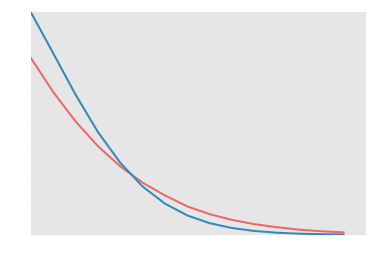

In [81]:


n2list = np.arange(30,60,2)
errlist = []; ovllist =[];
n1 = 25

for n2 in n2list:
  
  x,p1,p2,c1,c2 = getPoisson(n1,n2)
  thres, err = findThreshold(c1,c2)

  errlist.append(err)
  ovllist.append(getOverlap(n1,n2))
  
plt.plot(n2list,errlist)
plt.plot(n2list,ovllist)




In [0]:
class cdfOverlap(object):

  def __init__(self):
      pass

  def setNumbers(self,n1,n2):
    nl,ng = np.sort((n1,n2)).tolist()
    self.n1 = nl
    self.n2 = ng

  def getPoisson(self):
    self.x = np.arange(0,self.n2*2,1)
    self.p1 = poisson.pmf(self.x, self.n1);
    self.p2 = poisson.pmf(self.x, self.n2);
    self.c1 = poisson.cdf(self.x, self.n1);
    self.c2 = poisson.cdf(self.x, self.n2);

  def getGaussian(self):
    self.x = np.arange(0,self.n2*2,1e-2)
    self.p1 = norm.pdf(self.x, self.n1);
    self.p2 = norm.pdf(self.x, self.n2);
    self.c1 = norm.cdf(self.x, self.n1);
    self.c2 = norm.cdf(self.x, self.n2);

  def findThreshold(self):
    i = 0
    while self.c1[i] < 1-self.c2[i]:
      i += 1
    return i, 1+self.c2[i]-self.c1[i]

  def plotDF(self):
    fig = plt.subplots(2,1,figsize=(5,8))
    ax1 = plt.subplot(2,1,1)

    ax1.plot(self.x,self.p1,'bo',label='1')
    ax1.plot(self.x,self.p2,'ro',label='2')
    ax1.legend()

    ax2 = plt.subplot(2,1,2)

    ax2.plot(self.x,1-self.c1,'bo',label='1')
    ax2.plot(self.x,self.c2,'ro',label='2')
    ax2.plot(self.x,1+self.c2-self.c1,'go',label='2+1')
    ax2.legend()

  def getOverlap(self):
    return np.exp(-0.5*(np.sqrt(self.n2)-np.sqrt(self.n1))**2)

  
  def intOverlap(self):
    return np.sum(np.sqrt(self.p1*self.p2))/np.sum(self.p1)/np.sum(self.p2)




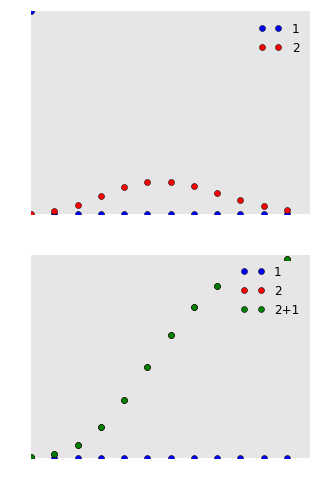

In [148]:
test1 = cdfOverlap()
npairs = [[0,6]]#,[10,30],[25,60],[0,3]]

for pair in npairs:
  n1, n2 = pair
  test1.setNumbers(n1,n2)
  test1.getPoisson()
  test1.plotDF()

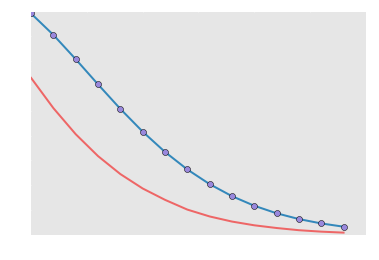

In [150]:

n2list = np.arange(30,60,2)
errlist = []; ovllist =[]; intoverlap = [];
n1 = 25

for n2 in n2list:
  test1.setNumbers(n1,n2)
  test1.getPoisson()
  thres, err = test1.findThreshold()

  errlist.append(err)
  ovllist.append(test1.getOverlap())
  intoverlap.append(test1.intOverlap())
  
plt.plot(n2list,errlist)
plt.plot(n2list,ovllist)
plt.plot(n2list,intoverlap,'o')



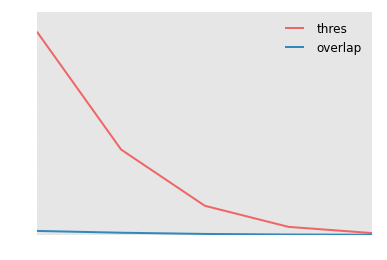

In [153]:
test2 = cdfOverlap()

n2list = np.arange(5,10,1)
errlist = []; ovllist =[];
n1 = 3

for n2 in n2list:
  test2.setNumbers(n1,n2)
  test2.getGaussian()
  thres, err = test2.findThreshold()
  errlist.append(err)
  ovllist.append(test2.intOverlap())
  
plt.plot(n2list,errlist,label='thres')
plt.plot(n2list,ovllist,label='overlap')
plt.legend()


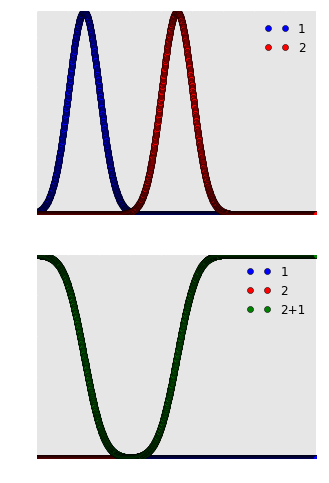

In [152]:
test1 = cdfOverlap()
npairs = [[3,9]]
for pair in npairs:
  n1, n2 = pair
  test1.setNumbers(n1,n2)
  test1.getGaussian()
  test1.plotDF()